### CUNY Data 620 - Web Analytics, Summer 2020
**Group Project 1**  
**Prof:** Alain Ledon  
**Members:** Misha Kollontai, Amber Ferger, Zach Alexander, Subhalaxmi Rout  

**YouTube Link:** 

### Instructions
1. Identify and load a network dataset that has some categorical information available for each node.
2. For each of the nodes in the dataset, calculate degree centrality and eigenvector centrality.
3. Compare your centrality measures across your categorical groups.

### Importing Packages

In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as spy
import numpy as np

### Data Set
* **Source**: [Sociopatterns.org Primary School Dataset](http://www.sociopatterns.org/datasets/primary-school-cumulative-networks/)
* **Format**: The network is stored in a Graph Exchange XML Format (GEXF). 
* **Description**: This dataset is comprised of a weighted network of face-to-face contact between students and teachers over 1 day in a primary school, as reported in the paper [High-Resolution Measurements of Face-to-Face Contact Patterns in a Primary School](http://www.sociopatterns.org/publications/high-resolution-measurements-of-face-to-face-contact-patterns-in-a-primary-school/). Nodes represent individuals and edges represent face-to-face interactions. There are 236 nodes and 5,899 connections in the network.
* **Nodes**: Nodes are made up of 2 features: *classname*, which is the grade/class of the individual, and *gender*. Teachers are represented by the classname *Teachers*. 
* **Edges**: Edges have 2 weights associated with them: *duration*, which is the time in seconds spent between individuals, and *count*, which is the number of face-to-face interactions between the individuals. 


### Network Characteristics
We will begin with a preliminary look at the characteristics of the network. First, we'll load in our GEXF file. We can confirm that there are 236 nodes and 5899 edges. We can also see what information is stored about each node and each edge.

In [2]:
G = nx.read_gexf("data/sp_data_school_day_1.gz")
print(G.number_of_nodes())
print(G.number_of_edges())

236
5899


In [3]:
print(G.nodes['1789'])
print(G.edges[('1789', '1821')])

{'classname': '1A', 'gender': 'M', 'viz': {'color': {'r': 0, 'g': 255, 'b': 41}, 'size': 10.0, 'position': {'x': -105.46777, 'y': -61.034737, 'z': 0.0}}, 'label': '1789'}
{'duration': 20, 'count': 1, 'id': '0'}


Next, we'll take a closer look at the node attributes. The *classname* attribute, which represents the grade and class of the individual, is made up of 10 distinct student classes and 1 teacher class. We can further identify which of the nodes in the network are teachers.

In [101]:
classname = nx.get_node_attributes(G, 'classname')

distinctClassname = list(set(classname.values()))

# distinct classes
print(distinctClassname)
print(len(distinctClassname))

['5B', '4B', '2A', '5A', '1B', '3B', '2B', '3A', '1A', 'Teachers', '4A']
11


In [102]:
# teacher nodes
allTeachers = {key: value for (key, value) in classname.items() if value == 'Teachers'}

# distinct teachers
print(list(allTeachers.keys()))
print(len(allTeachers))

['1668', '1709', '1521', '1653', '1650', '1745', '1746', '1824', '1753', '1852']
10


### Network Visualization
Now that we've explored the its characteristics, let's visualize the network.

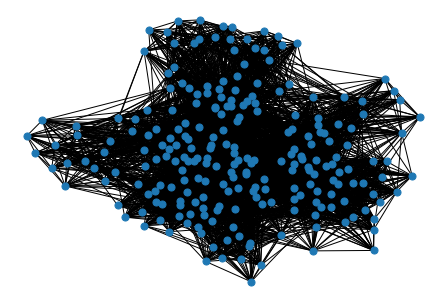

In [103]:
nx.draw(G, with_labels = False, font_weight='bold', node_size = 50)

Our first look is a bit cluttered. To visualize the data better, we'll alter the colors of the nodes by using an adaptation of the approach taken from the following [stackoverflow question](https://stackoverflow.com/questions/43265020/apply-color-to-specific-node-networkx). First, we'll define a function to access the color attribute of each node (which corresponds to the classname) and convert the colors to hex values.

In [104]:
def convert_to_hex(node) :
    if 'color' in node['viz']:
        red = node['viz']['color']['r']
        green = node['viz']['color']['g']
        blue = node['viz']['color']['b']
    else:
        red = 255
        green = 255
        blue = 255
    return '#%02x%02x%02x' % (red, green, blue)

We'll apply the function to each node. We'll also visualize the gender distribution in the network by assigning the color pink to female nodes, green to male nodes, and white to all others.

In [105]:
# node instead of nodes
colormap = []
gendercmp = []
for n in G:
    colormap.append(convert_to_hex(G.nodes[str(n)]))
    if G.nodes[str(n)]['gender'] == 'F':
        gendercmp.append('pink')
    elif G.nodes[str(n)]['gender'] == 'M':
        gendercmp.append('green')
    else:
        gendercmp.append('white')

##### Visualizing the nodes by classname   
We can start to see the clusters of students in each class. White nodes represent teachers in the network. 

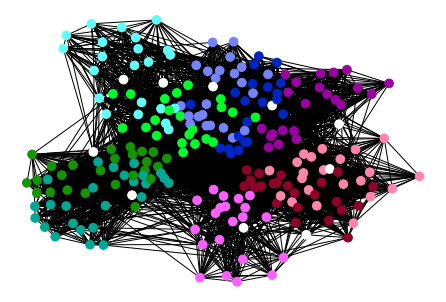

In [106]:
nx.draw(G, with_labels = False, font_weight='bold', node_size = 75, node_color = colormap)

##### Visualizing the nodes by gender
We can also take a look at the distribution by gender.

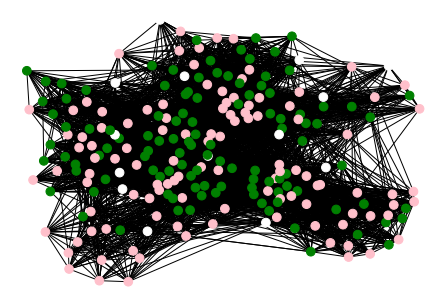

In [107]:
nx.draw(G, with_labels = False, font_weight='bold', node_size = 75, node_color = gendercmp)

### Calculating Centrality Measures

##### Subsetting the data by Gender and evaluating relative centrality metrics
Now that we've done an initial exploration of the network, we can define the degree and eigenvector centrality attributes for each node. The centrality metrics will give us an idea of how important a particular node is based on its degree. In our network, the degree will represent the communications that a student has with other individuals in the network.  

In order to compare centrality metrics across our categorical feature (gender), we'll store these values in separate lists for each gender.

In [11]:
Eigen_cent = nx.eigenvector_centrality(G)
f_d_cent = []
m_d_cent = []
f_e_cent = []
m_e_cent = []
for n in G.nodes:
    G.nodes[str(n)]['cent'] = G.degree[str(n)]/len(G)
    G.nodes[str(n)]['Eigen_c'] = Eigen_cent[str(n)]
    if G.nodes[str(n)]['gender'] == 'F':
        f_d_cent.append(G.degree[str(n)]/len(G))
        f_e_cent.append(Eigen_cent[str(n)])
    elif G.nodes[str(n)]['gender'] == 'M':
        m_d_cent.append(G.degree[str(n)]/len(G))
        m_e_cent.append(Eigen_cent[str(n)])

A first glance at the means of the degree centrality shows a lower average for females than males, and we can confirm the statistical significance with a t-test. 

In [108]:
print(np.mean(f_d_cent))
print(np.mean(m_d_cent))

0.1976502311248074
0.23097003631961258


In [109]:
spy.stats.ttest_ind(f_d_cent,m_d_cent)

Ttest_indResult(statistic=-3.130962171196755, pvalue=0.001978790853996796)

Based on the results of the t-test (p-value < 0.05) we can conclude that the average degree centrality of the female population is statistically significantly lower than that of the male population of the school. This suggests that on average, female individuals engaged in interactions with fewer individuals.  
  
We see similar results from the comparison of Eigenvector centrality measures between genders:

In [110]:
print(np.mean(f_e_cent))
print(np.mean(m_e_cent))
spy.stats.ttest_ind(f_e_cent,m_e_cent)

0.0547639891386447
0.06555186687620164


Ttest_indResult(statistic=-3.0160738448407387, pvalue=0.0028618838765044558)

Once again, the t-test results (p-value < 0.05) indicate that there a statistically significant difference between the female and male students. The females tend to engage in interactions with fewer individuals. 

### Further Analysis  - Weight Analytics

Our analysis above shows that the males in our network tend to interact with more people than females, but it doesn't tell us anything about the ***strength*** or ***frequency*** of the communications. Lucky for us, this information available in the form of edge weights -- each edge contains a *count* of interactions and a *duration* of interactions. We'll use these weights to get a better idea of the types of interactions each gender is having.  

##### Gender-specific subgraphs

In [122]:
# split females and males
female_nodes = [n for n,v in G.nodes(data = True) if v['gender'] == 'F']
male_nodes = [n for n,v in G.nodes(data = True) if v['gender'] == 'M']

# counts and durations for entire network
all_edges, all_count = zip(*nx.get_edge_attributes(G,'count').items())
_, all_dur = zip(*nx.get_edge_attributes(G,'duration').items())

# female subgraph
F = G.subgraph(female_nodes)
f_edges, f_count = zip(*nx.get_edge_attributes(F,'count').items())
_, f_dur = zip(*nx.get_edge_attributes(F,'duration').items())

# male subgraph
M = G.subgraph(male_nodes)
m_edges, m_count = zip(*nx.get_edge_attributes(M,'count').items())
_, m_dur = zip(*nx.get_edge_attributes(M,'duration').items())

Average female counts to average male counts

In [76]:
print(np.mean(f_count))
print(np.mean(m_count))
spy.stats.ttest_ind(f_count,m_count)

7.632687447346251
6.70245950809838


Ttest_indResult(statistic=2.046755833004513, pvalue=0.040773541356467234)

Average female interaction duration vs average male interaction duration

In [77]:
print(np.mean(f_dur))
print(np.mean(m_dur))
spy.stats.ttest_ind(f_dur,m_dur)

286.1668070766639
209.03419316136774


Ttest_indResult(statistic=3.7294301145075544, pvalue=0.00019564935793008956)

### Categorical Subgraph Visualization
##### Female Nodes Only

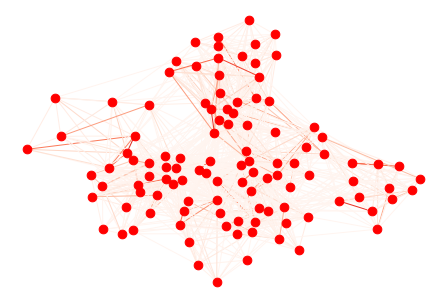

In [118]:
# visualizing counts of interactions
f_count_norm = [float(i)/max(all_count) for i in f_count]
pos = nx.spring_layout(F)
nx.draw(F, pos, node_size =75, node_color='r', edgelist=f_edges, edge_color=f_count_norm,  edge_cmap=plt.cm.Reds)

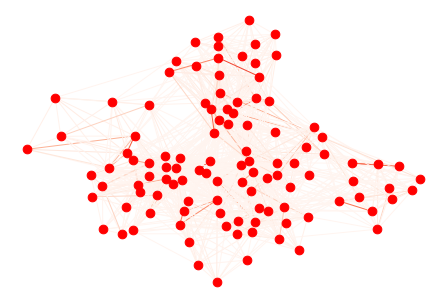

In [119]:
# vizualizing durations of interactions
f_dur_norm = [float(i)/max(all_dur) for i in f_dur]
nx.draw(F, pos, node_size =75, node_color='r', edgelist=f_edges, edge_color=f_dur_norm,  edge_cmap=plt.cm.Reds)

##### Male Nodes Only

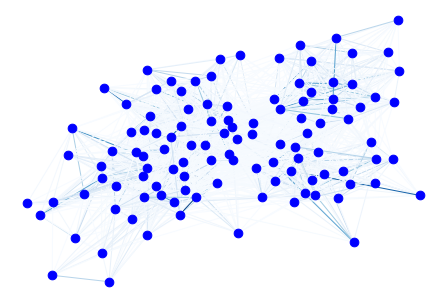

In [120]:
# visualizing counts of interactions
m_count_norm = [float(i)/max(all_count) for i in m_count]
posM = nx.spring_layout(M)
nx.draw(M, posM, node_size =75, node_color='b', edgelist=m_edges, edge_color=m_count_norm,  edge_cmap=plt.cm.Blues)

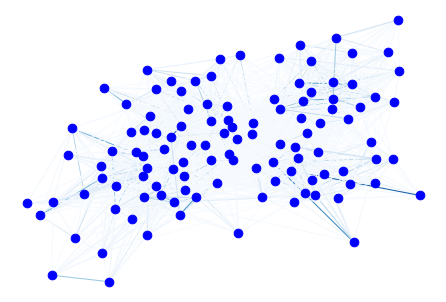

In [121]:
# visualizing duration of interactions
m_dur_norm = [float(i)/max(all_dur) for i in m_dur]
nx.draw(M, posM, node_size =75, node_color='b', edgelist=m_edges, edge_color=m_dur_norm,  edge_cmap=plt.cm.Blues)

### Conclusions & Discussion